In [16]:
%pip install missingno


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

In [18]:
df = pd.read_csv('Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [19]:
print('Number of examples and features:', df.shape)
print('features in the dataset:', df.columns.tolist())

Number of examples and features: (1000, 10)
features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [21]:
# Let's look at stats of the non-object features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


<Axes: >

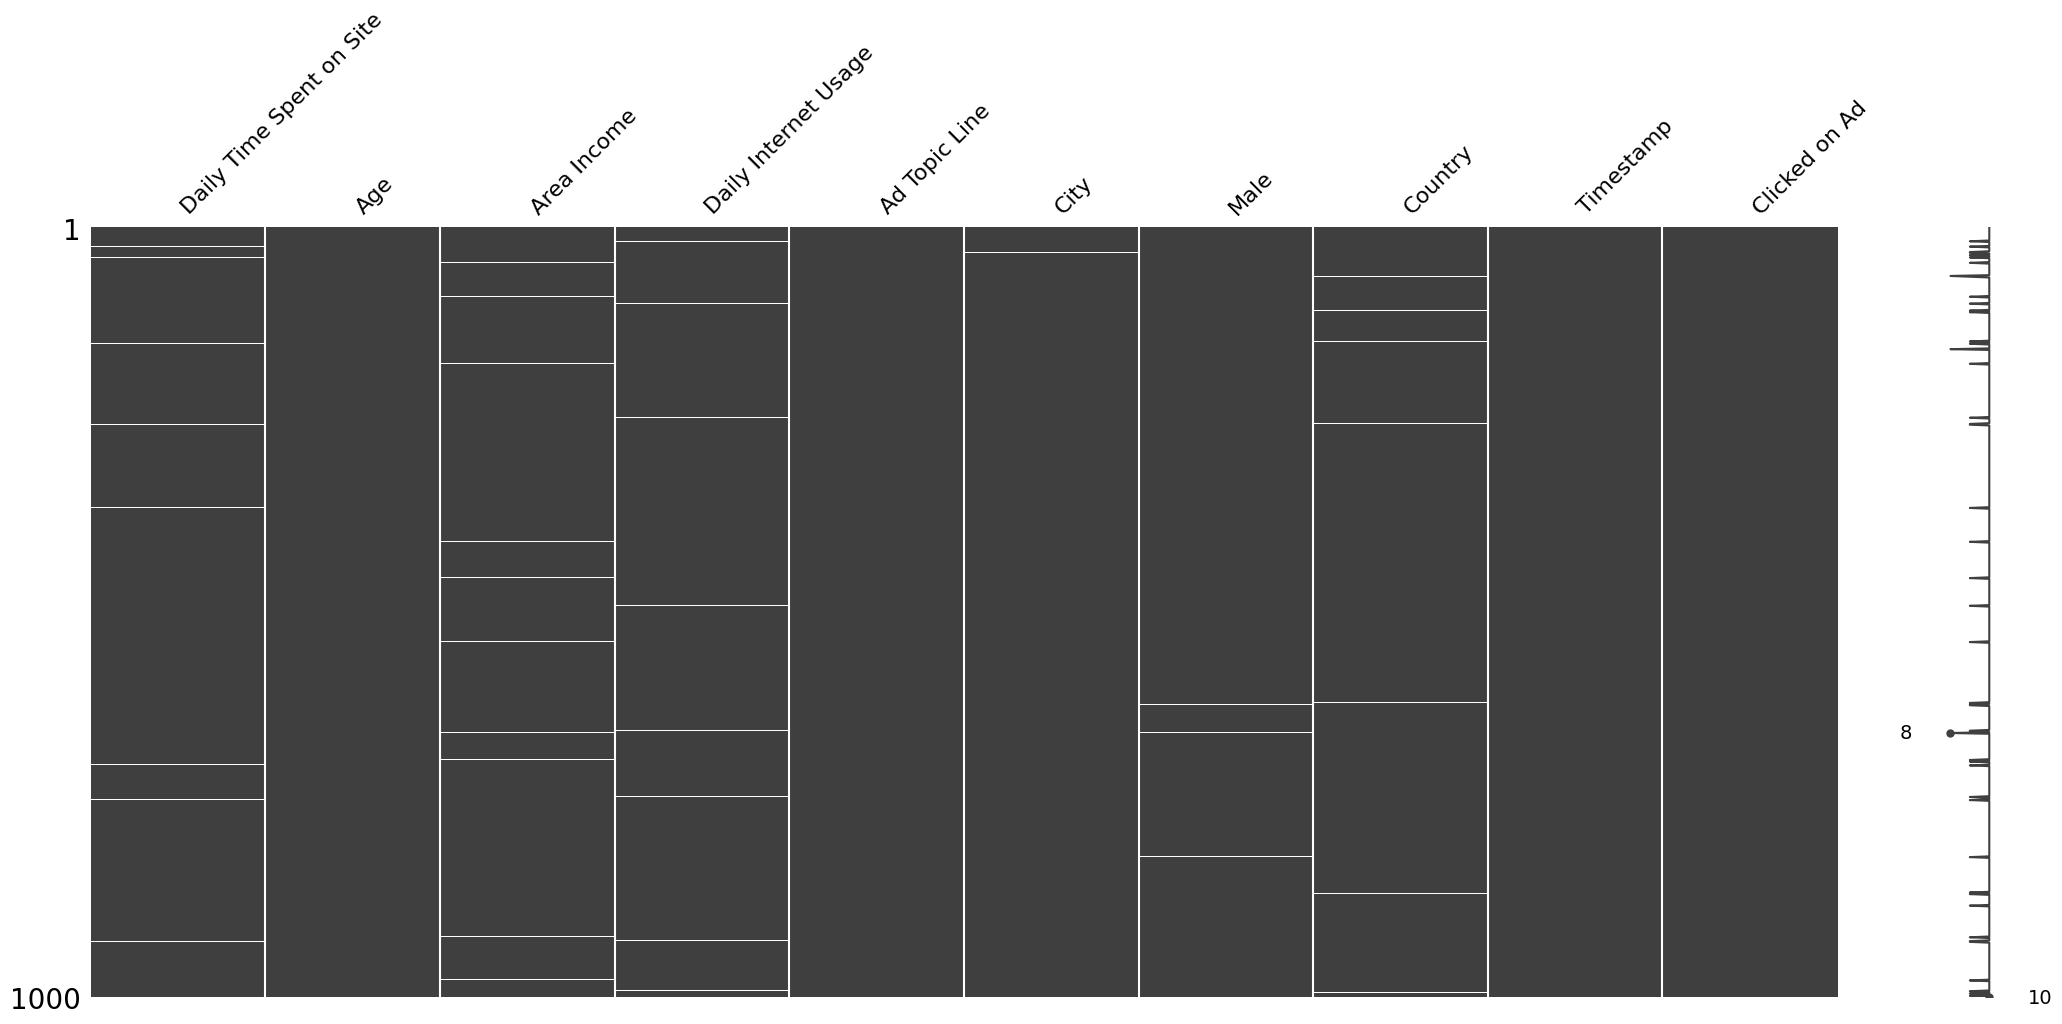

In [22]:
missingno.matrix(df)

c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

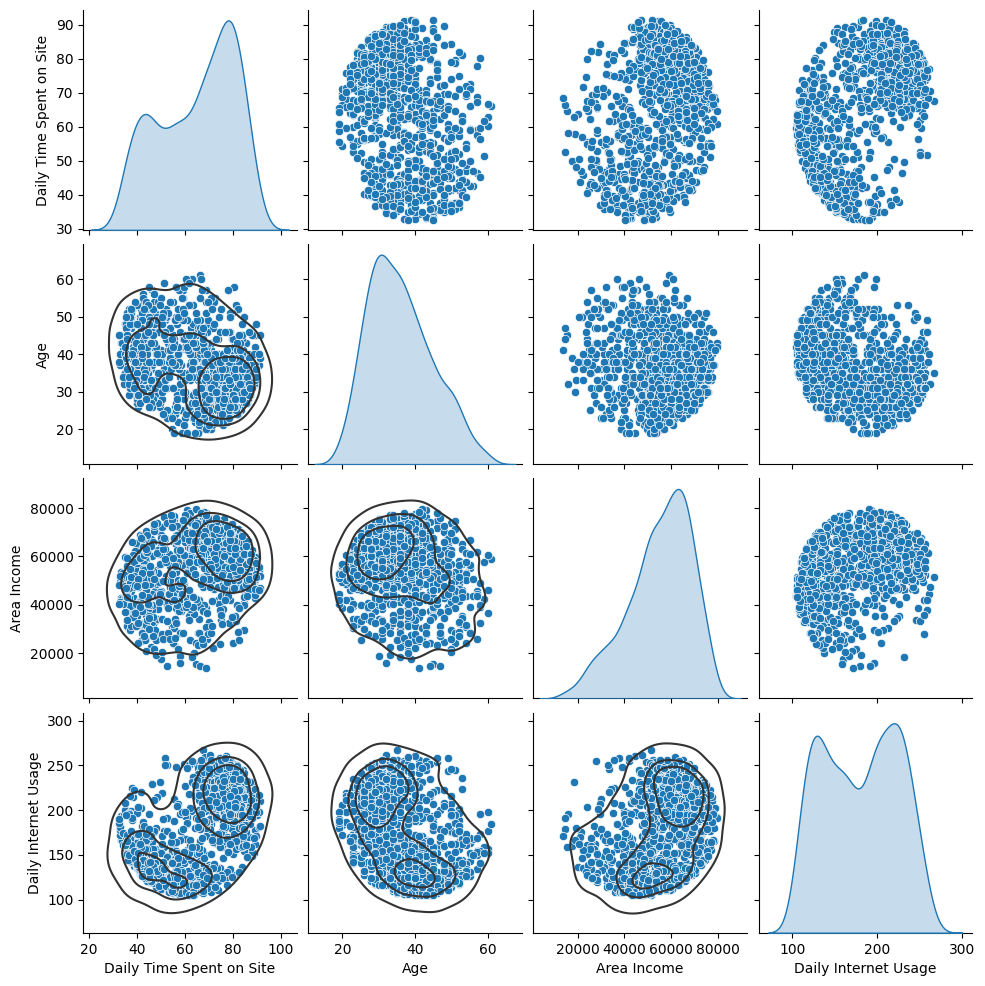

In [23]:
#plotting pairlot of numeric features
g = sns.pairplot(df[['Daily Time Spent on Site',
                     'Age',
                     'Area Income',
                     'Daily Internet Usage']], diag_kind="kde", palette='rocket')
g.map_lower(sns.kdeplot, levels=4, color=".2")

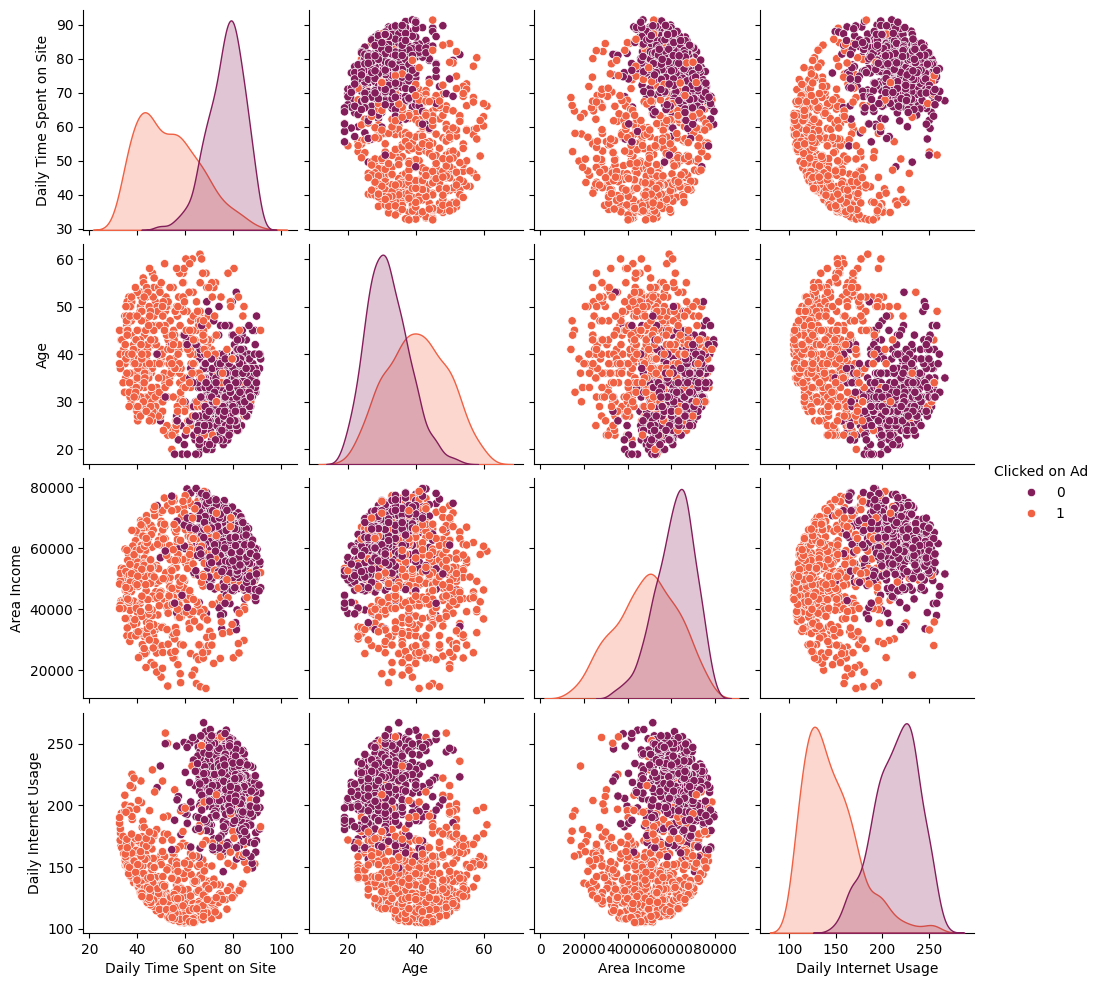

In [24]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

<Axes: xlabel='Age', ylabel='count'>

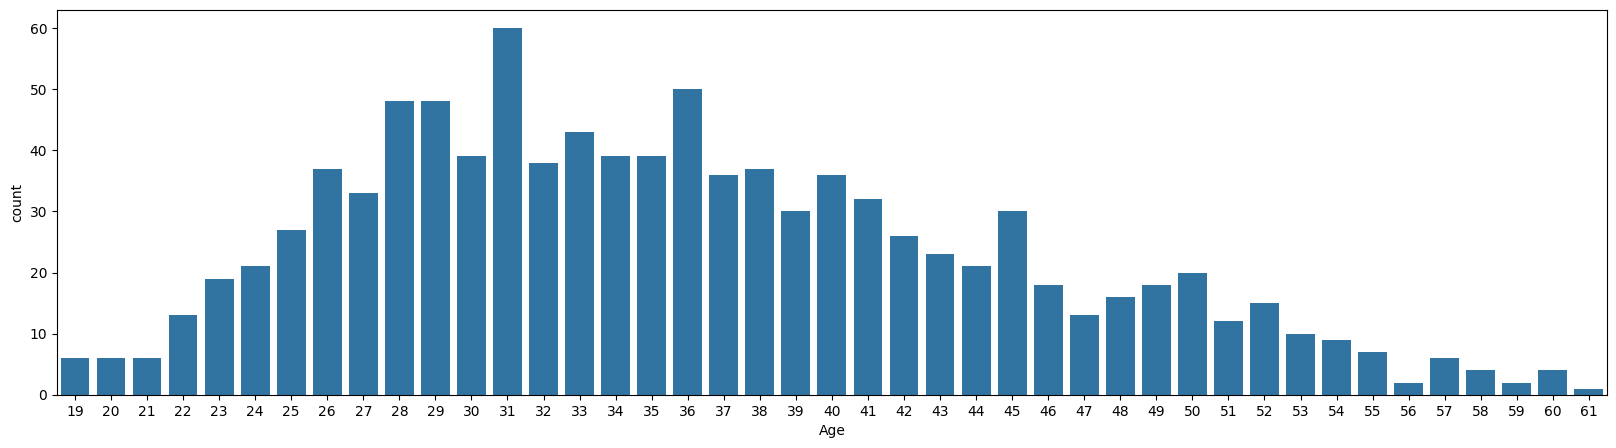

In [25]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (20, 5))
sns.countplot(x ='Age', data = df)

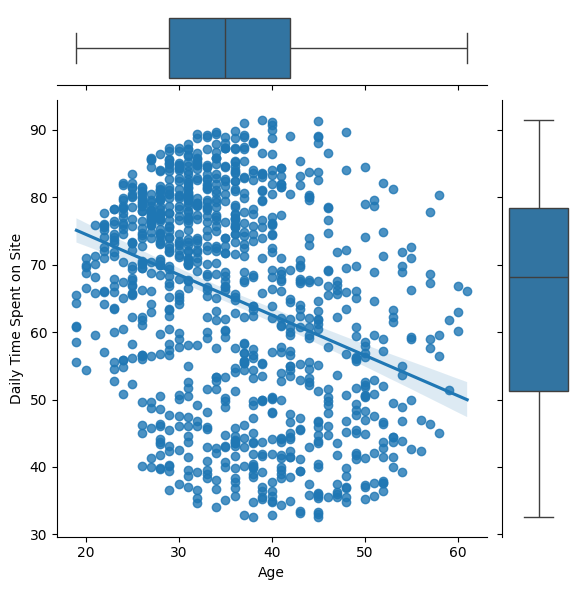

In [26]:
g = sns.JointGrid(data=df, x="Age", y='Daily Time Spent on Site')
g.plot(sns.regplot, sns.boxplot)

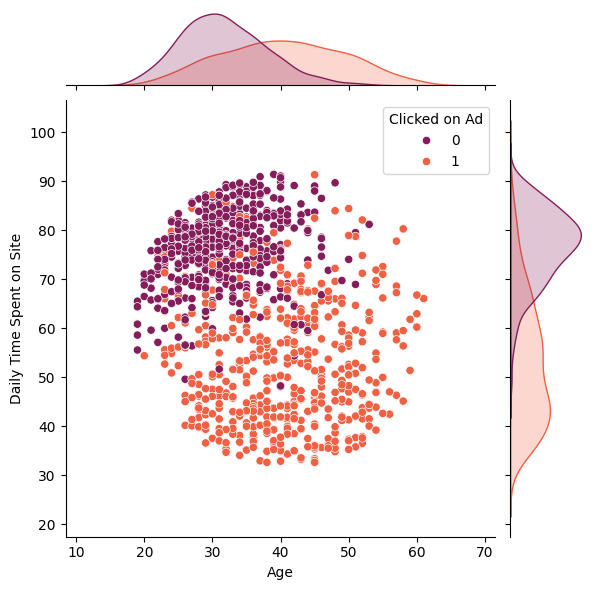

In [27]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')

In [28]:
sns.scatterplot(x='Area Income',y='Daily Time Spent on Site', hue='Clicked on Ad', data=data, palette='rocket');

NameError: name 'data' is not defined

In [ ]:
data = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)  
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
df_numeric = data.select_dtypes(exclude='object')
imputed_df = imputer.fit_transform(df_numeric)
df_train = pd.DataFrame(imputed_df)

df_train.columns = data.select_dtypes(exclude='object').columns
train_features = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']
numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']

scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

X = df_train[train_features]
y = df_train['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))

In [ ]:
print(accuracy_score(predictions, y_test))
print(confusion_matrix(predictions, y_test))